In [8]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%autoreload 2

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import data
import channels
import artists

In [11]:
x = [lambda distances: distances, 
     lambda distances: np.cos(distances*(np.pi-np.pi/2) + np.pi/2)+2,
     lambda distances: np.cos(distances*(np.pi/2-np.pi)+np.pi/2)+2,
     lambda distances: distances + edge]

In [12]:
y = [lambda distance: 0 * distances, 
     lambda distances: np.sin(distances*(np.pi-np.pi/2) + np.pi/2),
     lambda distances: np.sin(distances*(np.pi/2-np.pi)+np.pi/2),
     lambda distances: 0 * distances
     ]

In [13]:
color = [lambda distances : "red",
         lambda distances : "green",
         lambda distances : "orange",
         lambda distances : "blue"
]

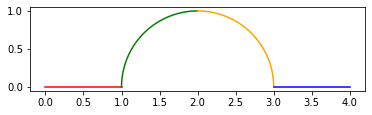

In [20]:
fig, ax = plt.subplots()
distances = np.linspace(0,1,1000)
for edge in range(4):
    ax.plot(x[edge](distances), y[edge](distances), color=color[edge](distances))
ax.set_aspect('equal')

In [21]:
#implict edge id is the index/loc in the array
vertex_table = [(0,1), (1,2), (2,3), (3,4)]
edge_table = {'x':x, 'y':y, 'color':color}

In [22]:
table = data.ContinuousLine(edge_table, vertex_table)

In [32]:
# data subsamples, 
# tau converts to axis coordinates
transforms = {'x': ('x', channels.Position()),
              'y': ('y', channels.Position()),
              'facecolor': ('color', channels.IdentityColor())}

In [29]:
table.view("edge").keys()

dict_keys(['index', 'x', 'y', 'color'])

[(0.0, 4.0), (-1.0, 1.5), Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), None]

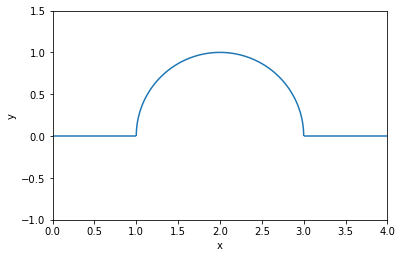

In [30]:
fig, ax = plt.subplots()

artist = artists.Line(table, transforms)
ax.add_artist(artist)
ax.set(xlim = (table.FB.F[transforms['x'][0]].min, 
               table.FB.F[transforms['x'][0]].max), 
       ylim = (table.FB.F[transforms['y'][0]].min, 
               table.FB.F[transforms['y'][0]].max+.5),       
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')


In [26]:
transforms_0d = {'x': ('x', channels.Position()),       
                 'y': ('y', channels.Position()),
                 'facecolors': ('color', channels.IdentityColor())} 

[(0.0, 4.0), (-1.0, 1.5), Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), None]

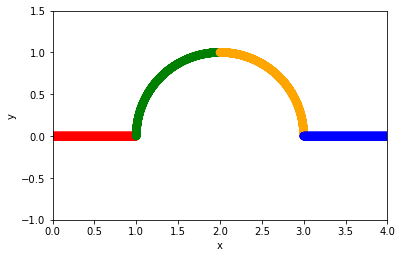

In [27]:
fig, ax = plt.subplots()

artist = artists.Point(table, transforms_0d)
ax.add_artist(artist)
ax.set(xlim = (table.FB.F[transforms_0d['x'][0]].min, 
               table.FB.F[transforms_0d['x'][0]].max), 
       ylim = (table.FB.F[transforms_0d['y'][0]].min, 
               table.FB.F[transforms_0d['y'][0]].max+.5),       
       xlabel = transforms_0d['x'][0], 
       ylabel = transforms_0d['y'][0], 
       aspect='equal')


In [15]:
transforms_0d = {'x': ('y', channels.Position()),       
                 'y': ('x', channels.Position()),
                 'facecolors': ('color', channels.IdentityColor())} 

[(-1.0, 1.0), (0.0, 4.5), Text(0.5, 0, 'y'), Text(0, 0.5, 'x'), None]

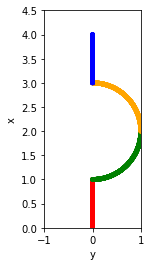

In [16]:
fig, ax = plt.subplots()

artist = artists.Point(table, transforms_0d)
ax.add_artist(artist)
ax.set(xlim = (table.FB.F[transforms_0d['x'][0]].min, 
               table.FB.F[transforms_0d['x'][0]].max), 
       ylim = (table.FB.F[transforms_0d['y'][0]].min, 
               table.FB.F[transforms_0d['y'][0]].max+.5),       
       xlabel = transforms_0d['x'][0], 
       ylabel = transforms_0d['y'][0], 
       aspect='equal')


In [18]:
import random
shuffled_data = list(zip(x,y,color, vertex_table))
random.shuffle(shuffled_data)
xs, ys, cs, vs = zip(*shuffled_data)

In [19]:
vs

((1, 2), (0, 1), (3, 4), (2, 3))

In [20]:
table = data.ContinuousLine({'x':xs, 'y':ys, 'color':cs}, vs)

In [28]:
cmap = {'red':'hotpink', 'green':'lightblue', 'orange':'hotpink', 'blue':'lightblue'}
transforms = {'x': ('x', channels.Position()),
              'y': ('y', channels.Position()),
              'facecolor': ('color', channels.NominalColor(cmap))}

[(0.0, 4.0), (-1.0, 1.5), Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), None]

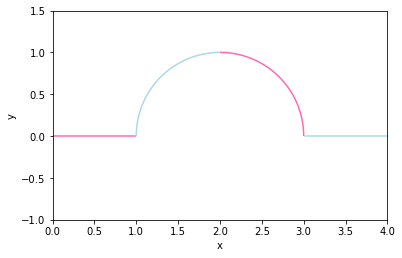

In [29]:
fig, ax = plt.subplots()

artist = artists.Line(table, transforms)
ax.add_artist(artist)
ax.set(xlim = (table.FB.F[transforms['x'][0]].min, 
               table.FB.F[transforms['x'][0]].max), 
       ylim = (table.FB.F[transforms['y'][0]].min, 
               table.FB.F[transforms['y'][0]].max+.5),       
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')
